In [203]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [301]:
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.max_rows', 200)

In [222]:
initial_df = pd.read_csv('Data_files/stack-overflow-developer-survey-2023/survey_results_public.csv')
questions_df = pd.read_csv('Data_files/stack-overflow-developer-survey-2023/survey_results_schema.csv')

In [223]:
EUR_PLN = 4.3

In [67]:
x = np.arange(1, 11)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [68]:
y = x ** 2
z = x ** 1.5

Text(0.5, 1.0, 'Simple chart')

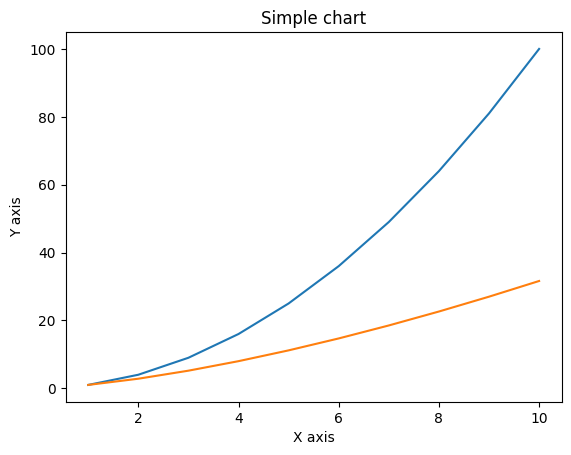

In [69]:
plt.plot(x, y)
plt.plot(x, z)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Simple chart')

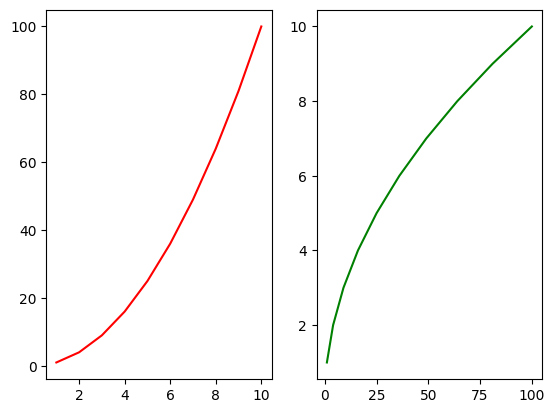

In [70]:
plt.subplot(1, 2, 1)
plt.plot(x, y, 'r')

plt.subplot(1, 2, 2)
plt.plot(y, x, 'g')

Text(0.5, 1.0, 'Smaller chart')

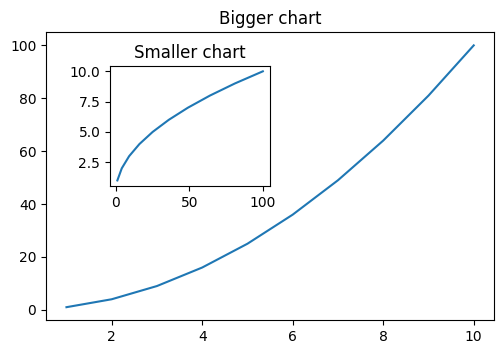

In [71]:
fig = plt.figure()

axes1 = fig.add_axes((0.1, 0.1, 0.7, 0.6))
axes2 = fig.add_axes((0.2, 0.38, 0.25, 0.25))

axes1.plot(x, y)
axes1.set_title('Bigger chart')
axes2.plot(y, x)
axes2.set_title('Smaller chart')

## StackOverflow developer survey

In [72]:
initial_df.head(3)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Bootstrapping a business;Professional development or se...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or family member;Hackathons (virtual or in-person);Onlin...,Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;Recorded...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testing;Observability tools,"Information Services, IT, Software Development, or other Technology",Appropriate in length,Easy,"285,000.00"
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced learning from online courses,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Colleague;On the job training;Other online resources (e.g., videos, blogs...",Formal documentation provided by the owner of the tech;Blogs with tips and tricks;How-to videos;...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testing;Observability tools;Innersource initiative;Devel...,"Information Services, IT, Software Development, or other Technology",Appropriate in length,Easy,"250,000.00"


In [73]:
initial_df.info(max_cols=10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Columns: 84 entries, ResponseId to ConvertedCompYearly
dtypes: float64(3), int64(1), object(80)
memory usage: 57.2+ MB


## Get full questions

In [87]:
questions_df.head(3)

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hello world! </strong></span></div>\n\n<div> </div>\n...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You consent to providing your information to help us ...",False,DB,TB


In [88]:
questions_df[['qname', 'question']]

# questions_df.loc[questions_df['qname'] == 'S2', 'question'].item()

only_questions_df = questions_df.loc[questions_df['qname'].isin(initial_df.columns), ['qname', 'question']]
only_questions_df.head()

,qname,question
3,Q120,
5,MainBranch,"Which of the following options best describes you today? For the purpose of this survey, a devel..."
6,Age,What is your age? *
7,Employment,Which of the following best describes your current employment status? Select all that apply.
8,RemoteWork,Which best describes your current work situation?


In [86]:
print(only_questions_df.shape)
print(questions_df.shape)
print(initial_df.shape)

(50, 2)
(78, 6)
(89184, 84)


### Question names unexplained in a schema dataset

In [117]:
question_name_series = pd.Series(initial_df.columns)

unexlained_question = question_name_series[~question_name_series.isin(questions_df['qname'])]
unexlained_question.name = 'Question names unexplained in a schema dataset'

print(f'Total questions: {question_name_series.shape}')
print(f'Number of explained questions: {only_questions_df.shape}')
print(f'Number of unexplained questions: {unexlained_question.shape}\n')

unexlained_question.head(8)

Total questions: (84,)
Number of explained questions: (50, 2)
Number of unexplained questions: (34,)



0                 ResponseId
21    LanguageHaveWorkedWith
22    LanguageWantToWorkWith
23    DatabaseHaveWorkedWith
24    DatabaseWantToWorkWith
25    PlatformHaveWorkedWith
26    PlatformWantToWorkWith
27    WebframeHaveWorkedWith
Name: Question names unexplained in a schema dataset, dtype: object

## Clean questions dataframe

### 1st way

In [183]:
list_questions = []

for qname in initial_df.columns:
    if qname in questions_df['qname'].to_list():
        list_questions.append(
            questions_df.loc[questions_df['qname'] == qname, 'question'].item()
        )
    else:
        list_questions.append(None)
        

clean_questions_df = pd.DataFrame(
    {'qname': initial_df.columns,
    'question': list_questions}
)

clean_questions_df.head(3)

,qname,question
0,ResponseId,None
1,Q120,
2,MainBranch,"Which of the following options best describes you today? For the purpose of this survey, a devel..."


### 2nd way

In [197]:
clean_questions_df = pd.DataFrame(
    {'qname': initial_df.columns}
)

clean_questions_df = clean_questions_df.merge(
    questions_df[['qname', 'question']],
    how='left',
    on='qname'
)

# print(clean_questions_df.shape)
# clean_questions_df

### 3rd way

In [199]:
question_name_series = pd.Series(
    data=initial_df.columns,
    name='qname'
)

clean_questions_df = questions_df[['qname', 'question']].merge(
    question_name_series,
    how='right',
    on='qname'
)

print(clean_questions_df.shape)
clean_questions_df

(84, 2)


,qname,question
0,ResponseId,NaN
1,Q120,
2,MainBranch,"Which of the following options best describes you today? For the purpose of this survey, a devel..."
3,Age,What is your age? *
4,Employment,Which of the following best describes your current employment status? Select all that apply.
5,RemoteWork,Which best describes your current work situation?
6,CodingActivities,Which of the following best describes the code you write outside of work? Select all that apply.
7,EdLevel,Which of the following best describes the highest level of formal education that you’ve complete...
8,LearnCode,How do you learn to code? Select all that apply.
9,LearnCodeOnline,What online resources do you use to learn to code? Select all that apply.


In [219]:
print(f'Corrency: {clean_questions_df.loc[clean_questions_df['qname'] == 'Currency', 'question'].item()}\n')
print(f'Annual Salary: {clean_questions_df.loc[clean_questions_df['qname'] == 'CompTotal', 'question'].item()}\n')

# clean_questions_df.loc[clean_questions_df['qname'] == 'ConvertedCompYearly', 'question'].item()


Corrency: Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in. *

Annual Salary: What is your current total <b>annual</b> compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent yearly salary. If you prefer not to answer, please leave the box empty.



### Practice dataframe

In [320]:
interesting_cols = ['MainBranch', 'Age', 'Employment', 'EdLevel',
                    'LearnCodeCoursesCert', 'YearsCode', 'Country',
                    'LanguageHaveWorkedWith', 'AIToolCurrently Using',
                    'TimeSearching', 'Industry', 'ConvertedCompYearly']

practice_df = initial_df.loc[[random.randint(0, initial_df.shape[0]-1) for n in range(50)], interesting_cols]
# practice_df = initial_df.loc[initial_df['Country'] == 'Poland', interesting_cols]


# practice_df.index = index=range(0, practice_df.shape[0])
practice_df.reset_index(drop=True, inplace=True)

practice_df.rename(
    columns={'ConvertedCompYearly': 'AnnualSalaryEUR'},
    inplace=True
)

practice_df['MonthlySalaryPLN'] = practice_df['AnnualSalaryEUR'] * EUR_PLN / 12

practice_df.head(1)

,MainBranch,Age,Employment,EdLevel,LearnCodeCoursesCert,YearsCode,Country,LanguageHaveWorkedWith,AIToolCurrently Using,TimeSearching,Industry,AnnualSalaryEUR,MonthlySalaryPLN
0,I am a developer by profession,45-54 years old,"Employed, full-time;Independent contractor, fr...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Pluralsight,39,Netherlands,C#;Erlang;F#;HTML/CSS;Java;JavaScript;Kotlin;M...,Learning about a codebase;Writing code;Documen...,NaN,NaN,"86,743.00","31,082.91"


#### Reorder columns

In [321]:
LearnCodeCoursesCert = practice_df.pop('LearnCodeCoursesCert')
AnnualSalaryEUR = practice_df.pop('AnnualSalaryEUR')
MonthlySalaryPLN = practice_df.pop('MonthlySalaryPLN')

# practice_df.insert(6, 'MonthlySalaryPLN', MonthlySalaryPLN.fillna(-1).round().astype(int).apply("{:,}".format).replace('-1', np.nan))
# practice_df.insert(6, 'AnnualSalaryEUR', AnnualSalaryEUR.fillna(-1).round().astype(int).apply("{:,}".format).replace('-1', np.nan))
# practice_df.insert(len(practice_df.columns), 'LearnCodeCoursesCert', LearnCodeCoursesCert)

practice_df.insert(6, 'MonthlySalaryPLN', MonthlySalaryPLN.round())
practice_df.insert(6, 'AnnualSalaryEUR', AnnualSalaryEUR.round())
practice_df.insert(len(practice_df.columns), 'LearnCodeCoursesCert', LearnCodeCoursesCert)

In [322]:
practice_df[practice_df['MonthlySalaryPLN'].notna()].head()

,MainBranch,Age,Employment,EdLevel,YearsCode,Country,AnnualSalaryEUR,MonthlySalaryPLN,LanguageHaveWorkedWith,AIToolCurrently Using,TimeSearching,Industry,LearnCodeCoursesCert
0,I am a developer by profession,45-54 years old,"Employed, full-time;Independent contractor, fr...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",39,Netherlands,"86,743.00","31,083.00",C#;Erlang;F#;HTML/CSS;Java;JavaScript;Kotlin;M...,Learning about a codebase;Writing code;Documen...,NaN,NaN,Pluralsight
2,I am a developer by profession,25-34 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,Germany,"128,507.00","46,048.00",Java;JavaScript;TypeScript,Writing code,NaN,NaN,NaN
3,I am a developer by profession,25-34 years old,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",7,Italy,"37,481.00","13,431.00",HTML/CSS;Java;JavaScript;Scala;SQL,NaN,60-120 minutes a day,Financial Services,NaN
4,I am a developer by profession,25-34 years old,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,Netherlands,"74,963.00","26,862.00",Bash/Shell (all shells);C#;HTML/CSS;JavaScript...,Writing code;Documenting code,NaN,NaN,Udemy
5,I am a developer by profession,25-34 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,United States of America,"100,000.00","35,833.00",C++;HTML/CSS;JavaScript;PowerShell;Python;SQL;...,Learning about a codebase;Documenting code,30-60 minutes a day,Oil & Gas,NaN


In [325]:
practice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              50 non-null     object 
 1   Age                     50 non-null     object 
 2   Employment              50 non-null     object 
 3   EdLevel                 50 non-null     object 
 4   YearsCode               49 non-null     object 
 5   Country                 50 non-null     object 
 6   AnnualSalaryEUR         32 non-null     float64
 7   MonthlySalaryPLN        32 non-null     float64
 8   LanguageHaveWorkedWith  50 non-null     object 
 9   AIToolCurrently Using   23 non-null     object 
 10  TimeSearching           24 non-null     object 
 11  Industry                23 non-null     object 
 12  LearnCodeCoursesCert    23 non-null     object 
dtypes: float64(2), object(11)
memory usage: 5.2+ KB
